# Calendário de Ciclo Menstrual (feito em R)
Baseado em calendários como:    
https://www.alwaysbrasil.com.br/pt-br/calendario-menstrual  
https://www.intimus.com.br/pt-br/period-calculator  

In [137]:
#Vai demorar um bocado, mas só precisa rodar uma única vez
install.packages("ggplot2")
library(ggplot2)
system("sudo apt-get install -y libmagick++-dev", intern = TRUE)
install.packages("magick")
library(magick)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Reading package lists..."                                                       
[2] "Building dependency tree..."                                                    
[3] "Reading state information..."                                                   
[4] "libmagick++-dev is already the newest version (8:6.9.10.23+dfsg-2.1ubuntu11.4)."
[5] "0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded."

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Insira abaixo 
Dia_D = as.Date("DIA-MES-ANO","%d-%m-%Y")   
(ex: 25-01-2023)  
Primeiro dia de sua menstruação como no exemplo abaixo  

Dia_N = DIAS    
(min 1, max 12)   
Número de cliclos/meses como no exemplo abaixo  

Dia_M = DIAS   
(min 1, max 10)   
Tempo da menstruação em dias (contando o primeiro dia) como no exemplo abaixo  

Dia_T = DIAS   
(min 20, max 35)  
Tempo para a proxima menstruação em dias como no exemplo abaixo  




In [138]:
Dia_D = as.Date("25-01-2023","%d-%m-%Y") #insira aqui
Dia_N = 12 #insira aqui
Dia_M = 2 #insira aqui
Dia_T = 28 #insira aqui
Dia_F = Dia_D+(Dia_N*Dia_T)-1  

## Após inserir as informações acima, é gerado o calendário em uma imagem .png

### Clique na imagem para aumentar ou diminuir seu tamanho

Saving 6.67 x 6.67 in image


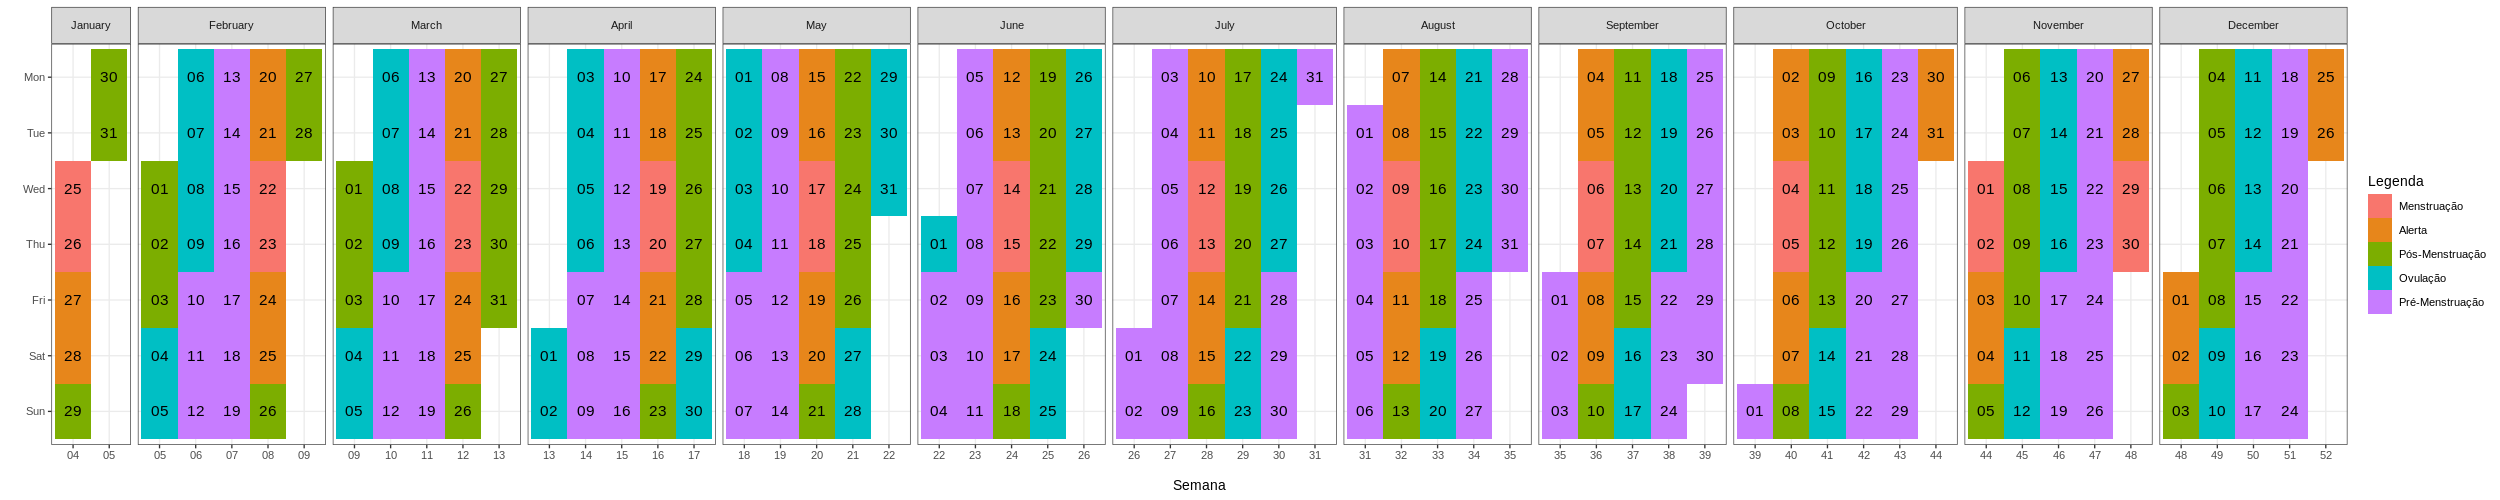

# A tibble: 1 × 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG     2500    500 sRGB       FALSE    83181 39x39  

In [139]:
dfr <- data.frame(date=seq(Dia_D,Dia_D+(Dia_N*Dia_T)-1,by=1))
dfr$day <- factor(strftime(dfr$date,format="%a"),levels=rev(c("Mon","Tue","Wed","Thu","Fri","Sat","Sun")))
dfr$week <- factor(strftime(dfr$date,format="%V"))
dfr$month <- factor(strftime(dfr$date,format="%B"),levels=c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"))
dfr$ddate <- factor(strftime(dfr$date,format="%d"))





dfr$Legenda[dfr$date>=Dia_D & dfr$date<=Dia_D+Dia_T-1] <- "Pré-Menstruação" #12dias
dfr$Legenda[dfr$date>=Dia_D-2 & dfr$date<=Dia_D+Dia_M-1-2] <- "Alerta" #2dias
dfr$Legenda[dfr$date>=Dia_D & dfr$date<=Dia_D+Dia_M-1] <- "Menstruação"  #2 dias
dfr$Legenda[dfr$date>=Dia_D+Dia_M & dfr$date<=Dia_D+Dia_M+7] <- "Pós-Menstruação" #9dias
dfr$Legenda[dfr$date>=Dia_D+2 & dfr$date<=Dia_D+Dia_M-1+2] <- "Alerta"#2 dias
dfr$Legenda[dfr$date>=Dia_D+10 & dfr$date<=Dia_D+15] <- "Ovulação" #5dias


dfr$Legenda[dfr$date>=Dia_D+Dia_T & dfr$date<=Dia_D+Dia_T+Dia_T-1] <- "Pré-Menstruação" #12dias
dfr$Legenda[dfr$date>=Dia_D+Dia_T-2 & dfr$date<=Dia_D+Dia_T-1+Dia_M-2] <- "Alerta" #2dias
dfr$Legenda[dfr$date>=Dia_D+Dia_T & dfr$date<=Dia_D+Dia_T-1+Dia_M] <- "Menstruação"  #2 dias
dfr$Legenda[dfr$date>=Dia_D+Dia_T+Dia_M & dfr$date<=Dia_D+Dia_T+Dia_M+7] <- "Pós-Menstruação" #9dias
dfr$Legenda[dfr$date>=Dia_D+Dia_T+2 & dfr$date<=Dia_D+Dia_T-1+Dia_M+2] <- "Alerta"#2 dias
dfr$Legenda[dfr$date>=Dia_D+Dia_T+10 & dfr$date<=Dia_D+Dia_T+15] <- "Ovulação" #5dias


dfr$Legenda[dfr$date>=Dia_D+Dia_T+Dia_T & dfr$date<=Dia_D+Dia_T+Dia_T-1+Dia_T] <- "Pré-Menstruação" #12dias
dfr$Legenda[dfr$date>=Dia_D+Dia_T+Dia_T-2 & dfr$date<=Dia_D+Dia_T-1+Dia_M+Dia_T-2] <- "Alerta" #2dias
dfr$Legenda[dfr$date>=Dia_D+Dia_T+Dia_T & dfr$date<=Dia_D+Dia_T-1+Dia_M+Dia_T] <- "Menstruação"  #2 dias
dfr$Legenda[dfr$date>=Dia_D+Dia_T+Dia_M+Dia_T & dfr$date<=Dia_D+Dia_T+Dia_M+7+Dia_T] <- "Pós-Menstruação" #9dias
dfr$Legenda[dfr$date>=Dia_D+Dia_T+Dia_T+2 & dfr$date<=Dia_D+Dia_T-1+Dia_M+Dia_T+2] <- "Alerta"#2 dias
dfr$Legenda[dfr$date>=Dia_D+Dia_T+Dia_T+10 & dfr$date<=Dia_D+Dia_T+Dia_T+15] <- "Ovulação" #5dias


dfr$Legenda[dfr$date>=Dia_D+(3*Dia_T) & dfr$date<=Dia_D+Dia_T-1+(3*Dia_T)] <- "Pré-Menstruação" #12dias
dfr$Legenda[dfr$date>=Dia_D+(3*Dia_T)-2 & dfr$date<=Dia_D-1+Dia_M+(3*Dia_T)-2] <- "Alerta" #2dias
dfr$Legenda[dfr$date>=Dia_D+(3*Dia_T) & dfr$date<=Dia_D-1+Dia_M+(3*Dia_T)] <- "Menstruação"  #2 dias
dfr$Legenda[dfr$date>=Dia_D+Dia_M+(3*Dia_T) & dfr$date<=Dia_D+Dia_M+7+(3*Dia_T)] <- "Pós-Menstruação" #9dias
dfr$Legenda[dfr$date>=Dia_D+(3*Dia_T)+2 & dfr$date<=Dia_D-1+Dia_M+(3*Dia_T)+2] <- "Alerta"#2 dias
dfr$Legenda[dfr$date>=Dia_D+(3*Dia_T)+10 & dfr$date<=Dia_D+(3*Dia_T)+15] <- "Ovulação" #5dias


dfr$Legenda[dfr$date>=Dia_D+(4*Dia_T) & dfr$date<=Dia_D+Dia_T-1+(4*Dia_T)] <- "Pré-Menstruação" #12dias
dfr$Legenda[dfr$date>=Dia_D+(4*Dia_T)-2 & dfr$date<=Dia_D-1+Dia_M+(4*Dia_T)-2] <- "Alerta" #2dias
dfr$Legenda[dfr$date>=Dia_D+(4*Dia_T) & dfr$date<=Dia_D-1+Dia_M+(4*Dia_T)] <- "Menstruação"  #2 dias
dfr$Legenda[dfr$date>=Dia_D+Dia_M+(4*Dia_T) & dfr$date<=Dia_D+Dia_M+7+(4*Dia_T)] <- "Pós-Menstruação" #9dias
dfr$Legenda[dfr$date>=Dia_D+(4*Dia_T)+2 & dfr$date<=Dia_D-1+Dia_M+(4*Dia_T)+2] <- "Alerta"#2 dias
dfr$Legenda[dfr$date>=Dia_D+(4*Dia_T)+10 & dfr$date<=Dia_D+(4*Dia_T)+15] <- "Ovulação" #5dias


dfr$Legenda[dfr$date>=Dia_D+(5*Dia_T) & dfr$date<=Dia_D+Dia_T-1+(5*Dia_T)] <- "Pré-Menstruação" #12dias
dfr$Legenda[dfr$date>=Dia_D+(5*Dia_T)-2 & dfr$date<=Dia_D-1+Dia_M+(5*Dia_T)-2] <- "Alerta" #2dias
dfr$Legenda[dfr$date>=Dia_D+(5*Dia_T) & dfr$date<=Dia_D-1+Dia_M+(5*Dia_T)] <- "Menstruação"  #2 dias
dfr$Legenda[dfr$date>=Dia_D+Dia_M+(5*Dia_T) & dfr$date<=Dia_D+Dia_M+7+(5*Dia_T)] <- "Pós-Menstruação" #9dias
dfr$Legenda[dfr$date>=Dia_D+(5*Dia_T)+2 & dfr$date<=Dia_D-1+Dia_M+(5*Dia_T)+2] <- "Alerta"#2 dias
dfr$Legenda[dfr$date>=Dia_D+(5*Dia_T)+10 & dfr$date<=Dia_D+(5*Dia_T)+15] <- "Ovulação" #5dias

dfr$Legenda[dfr$date>=Dia_D+(6*Dia_T) & dfr$date<=Dia_D+Dia_T-1+(6*Dia_T)] <- "Pré-Menstruação" #12dias
dfr$Legenda[dfr$date>=Dia_D+(6*Dia_T)-2 & dfr$date<=Dia_D-1+Dia_M+(6*Dia_T)-2] <- "Alerta" #2dias
dfr$Legenda[dfr$date>=Dia_D+(6*Dia_T) & dfr$date<=Dia_D-1+Dia_M+(6*Dia_T)] <- "Menstruação"  #2 dias
dfr$Legenda[dfr$date>=Dia_D+Dia_M+(6*Dia_T) & dfr$date<=Dia_D+Dia_M+7+(6*Dia_T)] <- "Pós-Menstruação" #9dias
dfr$Legenda[dfr$date>=Dia_D+(6*Dia_T)+2 & dfr$date<=Dia_D-1+Dia_M+(6*Dia_T)+2] <- "Alerta"#2 dias
dfr$Legenda[dfr$date>=Dia_D+(6*Dia_T)+10 & dfr$date<=Dia_D+(6*Dia_T)+15] <- "Ovulação" #5dias

dfr$Legenda[dfr$date>=Dia_D+(7*Dia_T) & dfr$date<=Dia_D+Dia_T-1+(7*Dia_T)] <- "Pré-Menstruação" #12dias
dfr$Legenda[dfr$date>=Dia_D+(7*Dia_T)-2 & dfr$date<=Dia_D-1+Dia_M+(7*Dia_T)-2] <- "Alerta" #2dias
dfr$Legenda[dfr$date>=Dia_D+(7*Dia_T) & dfr$date<=Dia_D-1+Dia_M+(7*Dia_T)] <- "Menstruação"  #2 dias
dfr$Legenda[dfr$date>=Dia_D+Dia_M+(7*Dia_T) & dfr$date<=Dia_D+Dia_M+7+(7*Dia_T)] <- "Pós-Menstruação" #9dias
dfr$Legenda[dfr$date>=Dia_D+(7*Dia_T)+2 & dfr$date<=Dia_D-1+Dia_M+(7*Dia_T)+2] <- "Alerta"#2 dias
dfr$Legenda[dfr$date>=Dia_D+(7*Dia_T)+10 & dfr$date<=Dia_D+(7*Dia_T)+15] <- "Ovulação" #5dias

dfr$Legenda[dfr$date>=Dia_D+(8*Dia_T) & dfr$date<=Dia_D+Dia_T-1+(8*Dia_T)] <- "Pré-Menstruação" #12dias
dfr$Legenda[dfr$date>=Dia_D+(8*Dia_T)-2 & dfr$date<=Dia_D-1+Dia_M+(8*Dia_T)-2] <- "Alerta" #2dias
dfr$Legenda[dfr$date>=Dia_D+(8*Dia_T) & dfr$date<=Dia_D-1+Dia_M+(8*Dia_T)] <- "Menstruação"  #2 dias
dfr$Legenda[dfr$date>=Dia_D+Dia_M+(8*Dia_T) & dfr$date<=Dia_D+Dia_M+7+(8*Dia_T)] <- "Pós-Menstruação" #9dias
dfr$Legenda[dfr$date>=Dia_D+(8*Dia_T)+2 & dfr$date<=Dia_D-1+Dia_M+(8*Dia_T)+2] <- "Alerta"#2 dias
dfr$Legenda[dfr$date>=Dia_D+(8*Dia_T)+10 & dfr$date<=Dia_D+(8*Dia_T)+15] <- "Ovulação" #5dias

dfr$Legenda[dfr$date>=Dia_D+(9*Dia_T) & dfr$date<=Dia_D+Dia_T-1+(9*Dia_T)] <- "Pré-Menstruação" #12dias
dfr$Legenda[dfr$date>=Dia_D+(9*Dia_T)-2 & dfr$date<=Dia_D-1+Dia_M+(9*Dia_T)-2] <- "Alerta" #2dias
dfr$Legenda[dfr$date>=Dia_D+(9*Dia_T) & dfr$date<=Dia_D-1+Dia_M+(9*Dia_T)] <- "Menstruação"  #2 dias
dfr$Legenda[dfr$date>=Dia_D+Dia_M+(9*Dia_T) & dfr$date<=Dia_D+Dia_M+7+(9*Dia_T)] <- "Pós-Menstruação" #9dias
dfr$Legenda[dfr$date>=Dia_D+(9*Dia_T)+2 & dfr$date<=Dia_D-1+Dia_M+(9*Dia_T)+2] <- "Alerta"#2 dias
dfr$Legenda[dfr$date>=Dia_D+(9*Dia_T)+10 & dfr$date<=Dia_D+(9*Dia_T)+15] <- "Ovulação" #5dias

dfr$Legenda[dfr$date>=Dia_D+(10*Dia_T) & dfr$date<=Dia_D+Dia_T-1+(10*Dia_T)] <- "Pré-Menstruação" #12dias
dfr$Legenda[dfr$date>=Dia_D+(10*Dia_T)-2 & dfr$date<=Dia_D-1+Dia_M+(10*Dia_T)-2] <- "Alerta" #2dias
dfr$Legenda[dfr$date>=Dia_D+(10*Dia_T) & dfr$date<=Dia_D-1+Dia_M+(10*Dia_T)] <- "Menstruação"  #2 dias
dfr$Legenda[dfr$date>=Dia_D+Dia_M+(10*Dia_T) & dfr$date<=Dia_D+Dia_M+7+(10*Dia_T)] <- "Pós-Menstruação" #9dias
dfr$Legenda[dfr$date>=Dia_D+(10*Dia_T)+2 & dfr$date<=Dia_D-1+Dia_M+(10*Dia_T)+2] <- "Alerta"#2 dias
dfr$Legenda[dfr$date>=Dia_D+(10*Dia_T)+10 & dfr$date<=Dia_D+(10*Dia_T)+15] <- "Ovulação" #5dias

dfr$Legenda[dfr$date>=Dia_D+(11*Dia_T) & dfr$date<=Dia_D+Dia_T-1+(11*Dia_T)] <- "Pré-Menstruação" #12dias
dfr$Legenda[dfr$date>=Dia_D+(11*Dia_T)-2 & dfr$date<=Dia_D-1+Dia_M+(11*Dia_T)-2] <- "Alerta" #2dias
dfr$Legenda[dfr$date>=Dia_D+(11*Dia_T) & dfr$date<=Dia_D-1+Dia_M+(11*Dia_T)] <- "Menstruação"  #2 dias
dfr$Legenda[dfr$date>=Dia_D+Dia_M+(11*Dia_T) & dfr$date<=Dia_D+Dia_M+7+(11*Dia_T)] <- "Pós-Menstruação" #9dias
dfr$Legenda[dfr$date>=Dia_D+(11*Dia_T)+2 & dfr$date<=Dia_D-1+Dia_M+(11*Dia_T)+2] <- "Alerta"#2 dias
dfr$Legenda[dfr$date>=Dia_D+(11*Dia_T)+10 & dfr$date<=Dia_D+(11*Dia_T)+15] <- "Ovulação" #5dias

dfr$Legenda[dfr$date>=Dia_D+(12*Dia_T)-2 & dfr$date<=Dia_D-1+Dia_M+(12*Dia_T)-2] <- "Alerta" #2dias


dfr$Legenda <- factor(dfr$Legenda,levels=c("Menstruação","Alerta","Pós-Menstruação","Ovulação","Pré-Menstruação"))

gg = ggplot(dfr,aes(x=week,y=day))+
  geom_tile(aes(fill=Legenda))+
  geom_text(aes(label=ddate))+
  facet_grid(~month,scales="free",space="free")+
  labs(x="Semana",y="")+
  theme_bw(base_size=10)+ 
  scale_fill_manual(labels=c("Menstruação","Alerta","Pós-Menstruação","Ovulação","Pré-Menstruação"), values=c("#F8766D","#E7861B","#7CAE00","#00BFC4","#C77CFF")) 

ggsave("test.png",
       plot = gg, dpi = 300)

ggsave("test.png", plot = gg, width = 25, height = 5, units = "in", dpi = 100)

image_read("test.png")
#CLIQUE NO CALENDÁRIO PARA ALTERAR O TAMANHO